In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [2]:
obs = load('../../Feb2021/Final_Models/Teleconnections/TSdataObs.joblib') 

In [3]:
y=obs[((obs.time.dt.month>11) | (obs.time.dt.month<2)) & 
             (obs.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31'))
y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0.32, 0.4 , 0.4 , ..., 0.24, 0.36, 0.36])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [46]:
AOData = xr.open_dataset('../../../Data/AO_EU/AO_Calculated.nc')

AO5D=AOData.AO#.rolling(time=5).mean()

AO5DAll=AO5D[((AO5D.time.dt.month>11) | (AO5D.time.dt.month<2)) & 
             (AO5D.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31')).rolling(time=5).mean()


In [47]:
def getFMean( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=list()
    
    for yr in range(1981,2019,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        ySMean = dArray.sel(time=slice(dStart,dEnd))[dArray.sel(time=slice(dStart,dEnd))>= 0.5].shape[0]
        #print(yAct)
        #print(yr)
        fg.append((ySMean))
        #print(ySMean)
    
    return fg

In [48]:
fMean=getFMean(y)
#AOMean=getMean(AO5DAll)

In [49]:
def getAMean( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=list()
    
    for yr in range(1981,2019,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        ySMean = dArray.sel(time=slice(dStart,dEnd))[dArray.sel(time=slice(dStart,dEnd))< 0.0].shape[0]
        #print(yAct)
        print(yr)
        fg.append((ySMean))
        print(ySMean)
    
    return fg

In [50]:
AOMean=getAMean(AO5DAll)
AOMean

1981
42
1982
47
1983
11
1984
34
1985
33
1986
51
1987
26
1988
30
1989
1
1990
21
1991
14
1992
17
1993
0
1994
40
1995
17
1996
45
1997
47
1998
36
1999
20
2000
19
2001
44
2002
24
2003
45
2004
35
2005
18
2006
33
2007
8
2008
13
2009
19
2010
53
2011
59
2012
15
2013
51
2014
33
2015
9
2016
25
2017
13
2018
37


[42,
 47,
 11,
 34,
 33,
 51,
 26,
 30,
 1,
 21,
 14,
 17,
 0,
 40,
 17,
 45,
 47,
 36,
 20,
 19,
 44,
 24,
 45,
 35,
 18,
 33,
 8,
 13,
 19,
 53,
 59,
 15,
 51,
 33,
 9,
 25,
 13,
 37]

In [58]:
dStart=datetime.datetime(1984, 12, 1)
dEnd=datetime.datetime(1985, 1, 31)
AO5DAll.sel(time=slice(dStart,dEnd))[AO5DAll.sel(time=slice(dStart,dEnd))<0.0]

<xarray.DataArray 'AO' (time: 33)>
array([-0.1593061 , -0.34865457, -0.45689994, -0.47328216, -0.49070284,
       -0.5951304 , -0.7871255 , -1.0093241 , -1.3120588 , -1.5754793 ,
       -1.7062243 , -1.6863724 , -1.5256016 , -1.1942612 , -0.8488743 ,
       -0.7364271 , -0.7359435 , -0.8269356 , -1.1596482 , -1.6510495 ,
       -2.0912588 , -2.5059373 , -2.857711  , -2.9714077 , -2.8406837 ,
       -2.4837453 , -2.04014   , -1.7123423 , -1.5458125 , -1.4730192 ,
       -1.4520334 , -1.3983864 , -1.266609  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1984-12-29T09:00:00 ... 1985-01-30T09:00:00

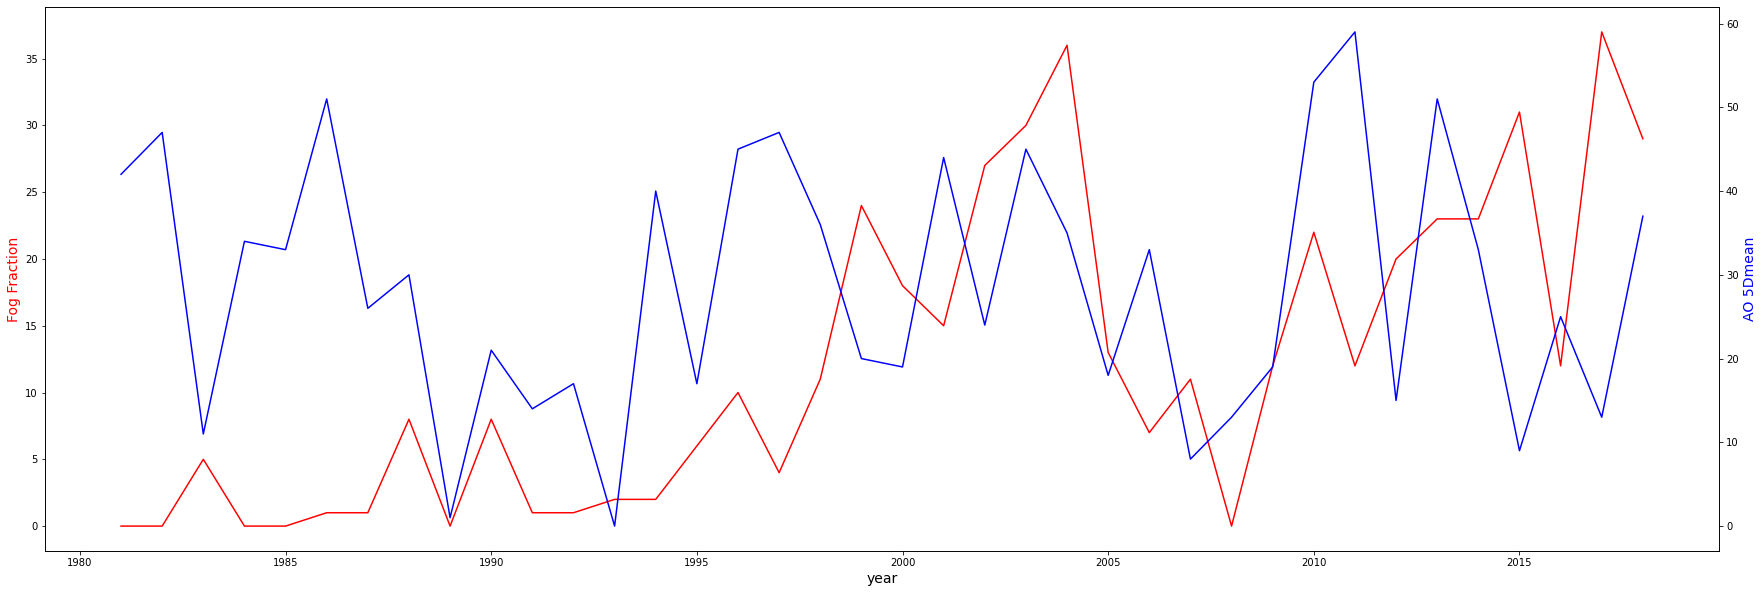

In [52]:
X=np.arange(1981,2019)

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=[30,10])
# make a plot
ax.plot(X, fMean, color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Fog Fraction",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X, AOMean,color="blue")
ax2.set_ylabel("AO 5Dmean",color="blue",fontsize=14)
plt.show()



In [53]:
X=np.arange(1981,2015)
X.shape

(34,)

In [54]:
len(fMean)

38

In [55]:
fMean

[0,
 0,
 5,
 0,
 0,
 1,
 1,
 8,
 0,
 8,
 1,
 1,
 2,
 2,
 6,
 10,
 4,
 11,
 24,
 18,
 15,
 27,
 30,
 36,
 13,
 7,
 11,
 0,
 12,
 22,
 12,
 20,
 23,
 23,
 31,
 12,
 37,
 29]